## Importing the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## Importing Dataset

In [10]:
dataset = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

## Understanding the Data

In [11]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
dataset.shape

(284807, 31)

In [13]:
print(dataset.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [14]:
# This dataset is highly unbalanced so for this first of all we will try building our model.
# then if we get bad results, we will use some different technique to solve this issue

In [15]:
# let's print the amount details for fruadulent and actual transactions and then comparing the mean (average) in both cases

In [16]:
fraud = dataset[dataset['Class']==1]

valid = dataset[dataset['Class']==0]

In [17]:
print("Amount transactions in case of fradulent:")
fraud.Amount.describe()

Amount transactions in case of fradulent:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
print("Amount transactions in case of actual:")
valid.Amount.describe()

Amount transactions in case of actual:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
# Therefore, we can clearly see that our fraudulent average transactions are more than the actual transactions
 

## Visualizing the Correlation matrix

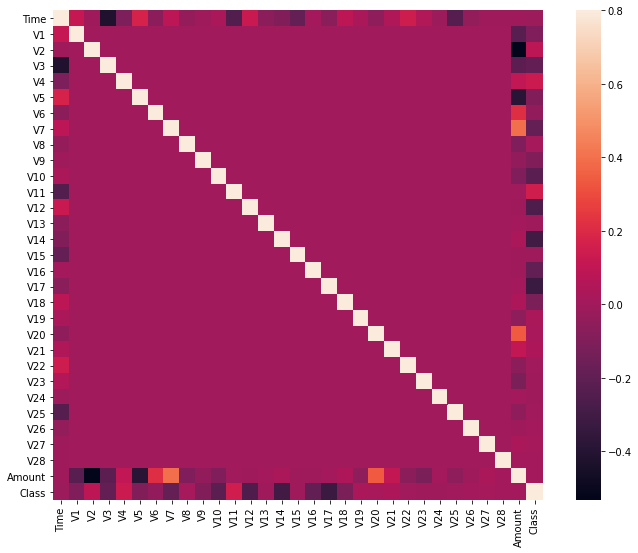

In [20]:
# We use correlation matrix to get best features we can work with in our future data modelling

corr = dataset.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr  , vmax = 0.8 , square = True)
plt.show()

## Splitting the dataset

In [21]:
# we will take small amount of dataset

data1 = dataset.sample(frac = 0.1, random_state=1)
data1.shape

(28481, 31)

In [22]:
dataset.shape

(284807, 31)

In [23]:
#lets check number of fraud and valid cases in our currrent dataset

fraud = data1[data1['Class'] == 1] 
valid = data1[data1['Class'] == 0] 

outlier_fraction = len(fraud)/float(len(valid))

print(outlier_fraction)

print("Fraud cases: {}".format(len(fraud)))
print("Valid cases: {}".format(len(valid)))

0.0017234102419808666
Fraud cases: 49
Valid cases: 28432


In [24]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [25]:
# Splitting the sample dataset

x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


## Training Our Model

In [47]:
# We will be using two different algorithms:-
# 1) Isolation Forest Algorithm
# 2) Local Outlier Factor(LOF) Algorithm

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

state = np.random.RandomState(42)

clf_1 = IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction,random_state=state, verbose=0)

clf_1.fit(x)
y_pred_1 = clf_1.predict(x)

y_pred_1[y_pred_1 == 1] = 0
y_pred_1[y_pred_1 == -1] = 1


n_errors = (y_pred_1 != y).sum()

print("Isolation Forest:{}".format(n_errors))
print("Accuracy score: {}".format(accuracy_score(y,y_pred_1)))
print("{}".format(classification_report(y,y_pred_1)))



Isolation Forest:77
Accuracy score: 0.9972964432428637
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

    accuracy                           1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481



In [48]:
clf_2 = LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)

y_pred_2 = clf_2.fit_predict(x)

scores_prediction = clf_2.negative_outlier_factor_
print(scores_prediction)

y_pred_2[y_pred_2 == 1] = 0
y_pred_2[y_pred_2 == -1] = 1


n_errors = (y_pred_2 != y).sum()

print("Isolation Forest:{}".format(n_errors))
print("Accuracy score: {}".format(accuracy_score(y,y_pred_2)))
print("{}".format(classification_report(y,y_pred_2)))

[-1.04009684 -1.01681044 -1.02971646 ... -0.9980937  -1.05205114
 -0.99057752]
Isolation Forest:97
Accuracy score: 0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

